## Exercise-4

Wenfeng Zhu-Computer Vision and Deep Learning: Visual Synthesis

**Import the necessary libraries**

In [2]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

### Task 1: Convolutions Revisited

1. **Gaining Intuition**
**(a) Stride=1 and padding=0: Calculate by hand the output of the first depth-slice of the convolution filter followed by a ReLU activation function. (1P)**
**(b) Repeat (a) but use a stride of 2. (1P)**

The input image:
$$\begin{bmatrix}1.& 0.& 0. &1. &1. \\ 0. &1. &0. &0. &0.\\ 0. &0. &0. &1. &0.\\1.& 0.& 0.& 0.& 1.\\1. &0.& 0.& 0.& 0. \end{bmatrix}$$
The 1. depth-slice:
$$r = \begin{bmatrix}1. & 0. \\ 0. & 1.\\ \end{bmatrix}$$
So stride=1 and padding=0 followed by a ReLU activation function:
$$\begin{bmatrix}1.& 0.& 0. &0.\\ 0. &0. &0. &0.\\ 0. &0. &0. &1.\\0.& 0.& 0.& 0. \end{bmatrix}$$
So stride=2 and padding=0 followed by a ReLU activation function:
$$\begin{bmatrix}1. & 0. \\ 0. & 0.\\ \end{bmatrix}$$

weight: torch.Size([3, 1, 2, 2]) bias: torch.Size([3])


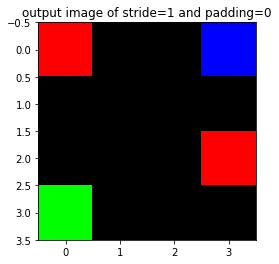

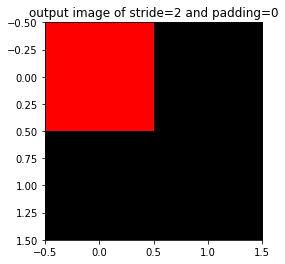

In [4]:
def task_1():
    input_img = torch.tensor(np.array([[[1., 0., 0., 1., 1.],
                                        [0., 1., 0., 0., 0.],
                                        [0., 0., 0., 1., 0.],
                                        [1., 0., 0., 0., 1.],
                                        [1., 0., 0., 0., 0.]]]))
    w = torch.tensor(np.array([[[[1., 0.], [0., 1.]]],
                               [[[1., 0.], [1., 0.]]],
                               [[[1., 1.], [0., 0.]]]]))
    bias = torch.tensor([-1., -1., -1.])
    conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(2, 2), bias=True, )
    with torch.no_grad():
        conv.weight = nn.Parameter(w)
        conv.bias = nn.Parameter(bias)
        print("weight:", conv.weight.size(), "bias:", conv.bias.size())
        pass

    output = F.relu(conv(input_img))
    output_img = output.permute(1, 2, 0).detach().numpy()
    plt.imshow(output_img)
    plt.title("output image of stride=1 and padding=0")
    plt.show()

    conv.stride = 2
    output = F.relu(conv(input_img))
    output_img = output.permute(1, 2, 0).detach().numpy()
    plt.imshow(output_img)
    plt.title("output image of stride=2 and padding=0")
    plt.show()


task_1()

### Task 2: Receptive field

1. **Calculate the receptive field of a neuron in the third layer of a CNN that consists of convolution layers with a kernel size of (3, 3) and a stride of 1. (1P)**

The receptive field of neuron in the third layer is : **7**

2. **Calculate the receptive field of a neuron in the second layer of a CNN where each convolution layer has a kernel size of (4,4) and a stride of 2. (1P)**

The receptive field of neuron in the second layer is : **10**

3. **Derive the general formula for the receptive field for a neuron in the n-th layer in terms of kernel size and stride of the relevant layers. (2P)**

The formula for feeling the field can be obtained:
$$
r_n = r_{n-1} + (k_n-1)\prod_{i = 1}^{n-1}s_i
$$
Among of them, $r_n$ and $r_{n-1}$ are the receptive fields of the n-th and n-1-th CNN layer, $k_n$ is the kernel size of n-th layer and $s_i$ the  stride of each layer